# ML CLASSIFIERS FOR COGNITIVE ENGAGEMENT PREDICTION

In [ ]:
## Start with loading libraries and and splitting the data for train and test set

In [1]:
##Libraries needed 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.svm import SVC


###for plots
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus



In [2]:
import pandas as pd
df = pd.read_csv('data_2.csv')
print(df.head())
print(df.shape)
print(df.dtypes)

      TextID  DESSC  DESWC  DESPL   DESSL  DESSLd  DESWLsy  DESWLsyd  DESWLlt  \
0   568_10_1      4    100      4  25.000  12.083    1.560     0.914    4.260   
1  568_100_1      1      7      1   7.000   0.000    1.286     0.488    4.000   
2  568_101_1     19    456     19  24.105  19.576    1.919     1.201    5.533   
3  568_102_1     16    309     16  19.313  13.642    1.825     1.196    5.256   
4  568_103_1      1     17      1  18.000   0.000    1.176     0.393    4.000   

   DESWLltd  ...  WRDHYPn  WRDHYPv  WRDHYPnv      RDFRE  RDFKGL    RDL2  \
0     2.729  ...    7.163    1.190     1.892  49.484001  12.568  16.278   
1     1.732  ...    8.981    2.250     3.930  90.933998   2.315  -3.804   
2     3.133  ...    6.999    2.000     2.602  20.128000  16.414  15.630   
3     3.185  ...    6.237    1.832     2.007  32.837002  13.477   6.941   
4     1.581  ...    4.937    1.309     1.114  90.089996   4.917  12.225   

   IsReply  Replies  AWLCount  Label  
0        0        1    

In [3]:
df["IsReply"] = df["IsReply"].astype("category")
print(df.dtypes)

TextID        object
DESSC          int64
DESWC          int64
DESPL          int64
DESSL        float64
              ...   
RDL2         float64
IsReply     category
Replies        int64
AWLCount       int64
Label          int64
Length: 109, dtype: object


In [4]:
###let's check whether there are any missing values
col_mask=df.isnull().any(axis=0) 
row_mask=df.isnull().any(axis=1)
df.loc[row_mask,col_mask]

""


In [5]:
#splitting the data in terms of features and target array 
#Splitting the data into independent and dependent variables
X = df.iloc[:,1:108].values
y = df.iloc[:,108].values
print('The independent features set: ')
print(X[:108,:])
print('The dependent variable: ')
print(y[:108])

The independent features set: 
[[  4. 100.   4. ...   0.   1.  14.]
 [  1.   7.   1. ...   1.   1.   0.]
 [ 19. 456.  19. ...   0.   2.  54.]
 ...
 [  2.  39.   2. ...   1.   1.   2.]
 [  3.  88.   3. ...   1.   0.   4.]
 [  2. 301.   2. ...   0.   0.  35.]]
The dependent variable: 
[0 1 2 2 0 3 0 1 0 1 1 0 1 1 1 2 2 2 2 1 1 2 0 2 2 1 2 2 1 0 1 1 1 0 1 1 2
 2 2 2 3 3 3 2 0 2 2 2 3 3 3 3 3 3 3 0 1 2 3 2 2 2 2 1 2 2 2 3 2 2 2 2 2 2
 3 2 2 3 1 3 3 3 1 3 1 2 2 2 2 1 3 1 1 3 2 2 2 2 2 1 3 3 3 2 2 1 3 0]


In [6]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 21)


## Decision Tree 

In [7]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer
dt_fit = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print("Cohen's Kappa:",cohen_kappa_score(y_test, y_pred))

Accuracy: 0.5197472353870458
[[212  90  15  32]
 [ 87 136  49  70]
 [ 16  61 162  61]
 [ 19  60  48 148]]
Cohen's Kappa: 0.3584482630724851


In [8]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [9]:
params_dt={'max_depth': [3, 6, 9, 12, None], 'min_samples_leaf':randint(1,10), 'max_features':randint(1,109), 'criterion':['gini', 'entropy']}

In [10]:
random_dt=RandomizedSearchCV(dt, params_dt, n_jobs = -1, cv=10,scoring= 'accuracy')
random_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 6, 9, 12, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023C046CFBB0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023C04AF5670>},
                   scoring='accuracy')

In [11]:
print("Tuned Decision Tree Parameters: {}".format(random_dt.best_params_))
print("Best score is {}".format(random_dt.best_score_))
###the accuracy increases to .59 if min samples leaf = 20, max features = 50

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 85, 'min_samples_leaf': 4}
Best score is 0.5801408612001832


In [12]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    print("Cohen's Kappa:",cohen_kappa_score(y_test, dt_classifier.predict(X_test)))
    print('Classification report:', classification_report(y_test, dt_classifier.predict(X_test)))
    print('Precision_recall_fscore_macro:',precision_recall_fscore_support(y_test, dt_classifier.predict(X_test), average='macro'))
    print('Precision_recall_fscore_micro:',precision_recall_fscore_support(y_test, dt_classifier.predict(X_test), average='micro'))
    print('Precision_recall_fscore_weighted:',precision_recall_fscore_support(y_test, dt_classifier.predict(X_test), average='weighted'))
    

random_dt.best_estimator_
dt_best = random_dt.best_estimator_
evaluate_model(dt_best)

Train Accuracy : 0.7878685191460522
Train Confusion Matrix:
[[756  62   9  21]
 [ 91 591  44 105]
 [ 26  47 470  87]
 [ 20  80  34 508]]
--------------------------------------------------
Test Accuracy : 0.5971563981042654
Test Confusion Matrix:
[[244  72  11  22]
 [ 89 158  33  62]
 [ 22  38 175  65]
 [ 18  49  29 179]]
Cohen's Kappa: 0.46175488614622806
Classification report:               precision    recall  f1-score   support

           0       0.65      0.70      0.68       349
           1       0.50      0.46      0.48       342
           2       0.71      0.58      0.64       300
           3       0.55      0.65      0.59       275

    accuracy                           0.60      1266
   macro avg       0.60      0.60      0.60      1266
weighted avg       0.60      0.60      0.60      1266

Precision_recall_fscore_macro: (0.6009887693799255, 0.5988427823705308, 0.5969497499910967, None)
Precision_recall_fscore_micro: (0.5971563981042654, 0.5971563981042654, 0.597156398104

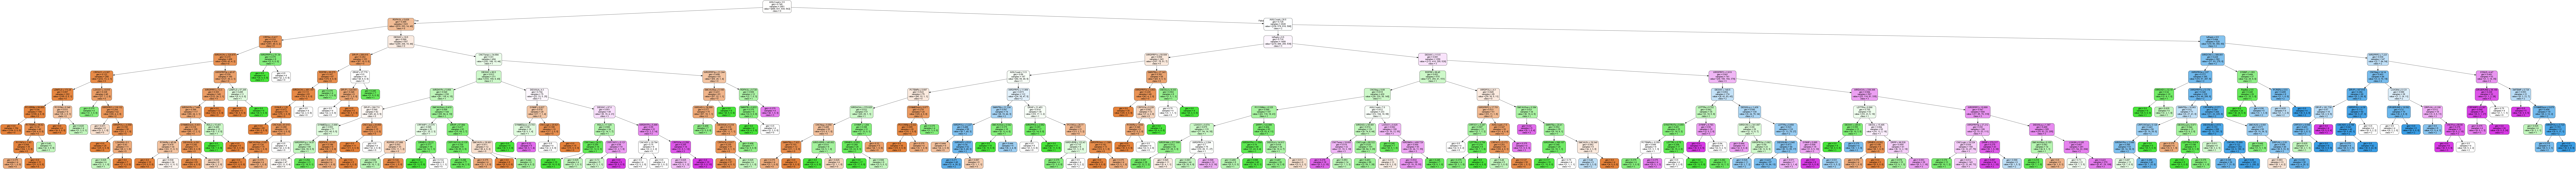

In [13]:
feature_names = df.columns.tolist()
features=feature_names[1:108]

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dt.png')
Image(graph.create_png())

## Random Forest

In [14]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [15]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
#Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Eng'], colnames=['Predicted Eng']))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa:",cohen_kappa_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Predicted Eng    0    1    2    3
Actual Eng                       
0              259   62   14   14
1               70  184   33   55
2                2   40  200   58
3                5   65   27  178
Accuracy: 0.6484992101105845
Cohen's Kappa: 0.5302803543512246
              precision    recall  f1-score   support

           0       0.77      0.74      0.76       349
           1       0.52      0.54      0.53       342
           2       0.73      0.67      0.70       300
           3       0.58      0.65      0.61       275

    accuracy                           0.65      1266
   macro avg       0.65      0.65      0.65      1266
weighted avg       0.65      0.65      0.65      1266



In [16]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
criterion = ['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               
               
         }
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']}


In [17]:
rf = RandomForestClassifier(random_state = 42)

# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [18]:
def evaluate_model(rf_classifier):
    print("Train Accuracy :", accuracy_score(y_train, rf_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, rf_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, rf_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, rf_classifier.predict(X_test)))
    print("Cohen's Kappa:",cohen_kappa_score(y_test, rf_classifier.predict(X_test)))
    print('Classification report:', classification_report(y_test, rf_classifier.predict(X_test)))
    print('Precision_recall_fscore_macro:',precision_recall_fscore_support(y_test, rf_classifier.predict(X_test), average='macro'))
    print('Precision_recall_fscore_micro:',precision_recall_fscore_support(y_test, rf_classifier.predict(X_test), average='micro'))
    print('Precision_recall_fscore_weighted:',precision_recall_fscore_support(y_test, rf_classifier.predict(X_test), average='weighted'))
    
    
    
    
print(rf_random.best_estimator_)
rf_best =rf_random.best_estimator_
evaluate_model(rf_best)

RandomForestClassifier(max_depth=60, min_samples_leaf=2, n_estimators=1600,
                       random_state=42)
Train Accuracy : 0.9979667909183327
Train Confusion Matrix:
[[848   0   0   0]
 [  2 829   0   0]
 [  1   0 629   0]
 [  2   0   1 639]]
--------------------------------------------------
Test Accuracy : 0.6642969984202212
Test Confusion Matrix:
[[258  66  12  13]
 [ 69 190  30  53]
 [  1  33 206  60]
 [  6  53  29 187]]
Cohen's Kappa: 0.5516440551276571
Classification report:               precision    recall  f1-score   support

           0       0.77      0.74      0.76       349
           1       0.56      0.56      0.56       342
           2       0.74      0.69      0.71       300
           3       0.60      0.68      0.64       275

    accuracy                           0.66      1266
   macro avg       0.67      0.67      0.67      1266
weighted avg       0.67      0.66      0.67      1266

Precision_recall_fscore_macro: (0.6672842613255244, 0.665369309137217

## Support Vector Machine

In [19]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict(X_test)
svm_clf.score(X_test, y_test)

0.5774091627172195

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['linear','poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
random = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
random_search = RandomizedSearchCV(model, random, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
random_result = random_search.fit(X, y)

In [ ]:
# define model and parameters
svm = SVC()
kernel = ['poly', 'rbf', 'sigmoid', 'linear']
###penalizes for the complexity 
### c means regularization
###higher c values = more penalization whenever the model makes a misclassification--> overfitting(?)
C = [ 50, 10, 1.0, 0.1]

# define grid search
params = dict(kernel=kernel,C=C)
random_svm = RandomizedSearchCV(svm, params, n_jobs=-1, cv=10, scoring='accuracy')
random = random_svm.fit(X_train, y_train)


In [ ]:
def evaluate_model(svm_classifier):
    print("Train Accuracy :", accuracy_score(y_train, svm_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, svm_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, svm_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, svm_classifier.predict(X_test)))
    print("Cohen's Kappa:",cohen_kappa_score(y_test, svm_classifier.predict(X_test)))
    print('Classification report:', classification_report(y_test, svm_classifier.predict(X_test)))
    print('Precision_recall_fscore_macro:',precision_recall_fscore_support(y_test, svm_classifier.predict(X_test), average='macro'))
    print('Precision_recall_fscore_micro:',precision_recall_fscore_support(y_test, svm_classifier.predict(X_test), average='micro'))
    print('Precision_recall_fscore_weighted:',precision_recall_fscore_support(y_test, svm_classifier.predict(X_test), average='weighted'))
    
    
    
    
    
    
print(random_result.best_estimator_)
svm_best =random_result.best_estimator_
evaluate_model(svm_best)

In [ ]:
random_result.best_estimator_

In [ ]:
svm_result

In [27]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

AttributeError: 'SVC' object has no attribute 'SVC'